In [36]:
# Dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import sem
%matplotlib inline

In [37]:
# Read in clinical trial data
trial_df = pd.read_csv("raw_data\clinicaltrial_data.csv")
#trial_df.head()

In [38]:
# Read in mouse drug data
mouse_df = pd.read_csv("raw_data\mouse_drug_data.csv")
#mouse_df.head()

In [39]:
# Merge the data sets
data_df = pd.merge(mouse_df, trial_df, on="Mouse ID")
data_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [40]:
# Analyze four treatments (of ten): Capomulin, Infubinol, Ketapril, and Placebo
capomulin_df = data_df.loc[data_df["Drug"] == "Capomulin"]
infubinol_df = data_df.loc[data_df["Drug"] == "Infubinol"]
ketapril_df = data_df.loc[data_df["Drug"] == "Ketapril"]
placebo_df = data_df.loc[data_df["Drug"] == "Placebo"]

In [41]:
# Plot each of our drugs
capomulin_group = capomulin_df.groupby("Timepoint")
capomulin_means = capomulin_group.mean()
capomulin_sems = capomulin_group.sem()

capomulin_means = capomulin_means["Tumor Volume (mm3)"].values
capomulin_sems = capomulin_sems["Tumor Volume (mm3)"].values

In [42]:
infubinol_group = infubinol_df.groupby("Timepoint")
infubinol_means = infubinol_group.mean()
infubinol_sems = infubinol_group.sem()

infubinol_means = infubinol_means["Tumor Volume (mm3)"].values
infubinol_sems = infubinol_sems["Tumor Volume (mm3)"].values

In [43]:
ketapril_group = ketapril_df.groupby("Timepoint")
ketapril_means = ketapril_group.mean()
ketapril_sems = ketapril_group.sem()

ketapril_means = ketapril_means["Tumor Volume (mm3)"].values
ketapril_sems = ketapril_sems["Tumor Volume (mm3)"].values

In [44]:
placebo_group = placebo_df.groupby("Timepoint")
placebo_means = placebo_group.mean()
placebo_sems = placebo_group.sem()

placebo_means = placebo_means["Tumor Volume (mm3)"].values
placebo_sems = placebo_sems["Tumor Volume (mm3)"].values

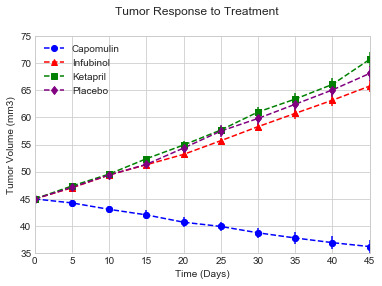

In [45]:

x_axis = np.arange(0, 46, 5)
fig, ax = plt.subplots()
fig.suptitle("Tumor Response to Treatment")

ax.set_xlabel("Time (Days)")
ax.set_ylabel("Tumor Volume (mm3)")
ax.errorbar(x_axis, capomulin_means, capomulin_sems, fmt="o", color="b")
ax.plot(x_axis, capomulin_means, "bo--", label="Capomulin")
ax.errorbar(x_axis, infubinol_means, infubinol_sems, fmt="^", color="r")
ax.plot(x_axis, infubinol_means, "r^--", label="Infubinol")
ax.errorbar(x_axis, ketapril_means, ketapril_sems, fmt="s", color="g")
ax.plot(x_axis, ketapril_means, "gs--", label="Ketapril")
ax.errorbar(x_axis, placebo_means, placebo_sems, fmt="d", color="purple")
ax.plot(x_axis, placebo_means, "d--", color="purple", label="Placebo")

ax.set_xlim(0, 45)
ax.set_ylim(35, 75)
ax.grid(True)
sns.set_style("whitegrid")
plt.legend(loc="best")
plt.show()

In [46]:
# Number of metastatic sites changes over time for each treatment

capomulin_metastatic_means = capomulin_group["Metastatic Sites"].mean().values
capomulin_metastatic_sems = capomulin_group["Metastatic Sites"].sem().values

infubinol_metastatic_means = infubinol_group["Metastatic Sites"].mean().values
infubinol_metastatic_sems = infubinol_group["Metastatic Sites"].sem().values

ketapril_metastatic_means = ketapril_group["Metastatic Sites"].mean().values
ketapril_metastatic_sems = ketapril_group["Metastatic Sites"].sem().values

placebo_metastatic_means = placebo_group["Metastatic Sites"].mean().values
placebo_metastatic_sems = placebo_group["Metastatic Sites"].sem().values

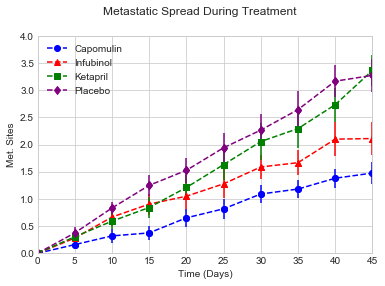

In [58]:
fig, ax = plt.subplots()
fig.suptitle("Metastatic Spread During Treatment")

ax.set_xlabel("Time (Days)")
ax.set_ylabel("Met. Sites")
ax.errorbar(x_axis, capomulin_metastatic_means, capomulin_metastatic_sems, fmt="o", color="b")
ax.plot(x_axis, capomulin_metastatic_means, "bo--", label="Capomulin")
ax.errorbar(x_axis, infubinol_metastatic_means, infubinol_metastatic_sems, fmt="^", color="r")
ax.plot(x_axis, infubinol_metastatic_means, "r^--", label="Infubinol")
ax.errorbar(x_axis, ketapril_metastatic_means, ketapril_metastatic_sems, fmt="s", color="g")
ax.plot(x_axis, ketapril_metastatic_means, "gs--", label="Ketapril")
ax.errorbar(x_axis, placebo_metastatic_means, placebo_metastatic_sems, fmt="d", color="purple")
ax.plot(x_axis, placebo_metastatic_means, "d--", color="purple", label="Placebo")

ax.set_xlim(0, 45)
ax.set_ylim(0, 4)
ax.legend(loc="best", fancybox=True)
plt.show()

In [68]:
# Survival rates for each drug
capomulin_survival = capomulin_group["Mouse ID"].count().values
capomulin_survival = capomulin_survival / 25 * 100

infubinol_survival = infubinol_group["Mouse ID"].count().values
infubinol_survival = infubinol_survival / 25 * 100

ketapril_survival = ketapril_group["Mouse ID"].count().values
ketapril_survival = ketapril_survival / 25 * 100

placebo_survival = placebo_group["Mouse ID"].count().values
placebo_survival = placebo_survival / 25 * 100

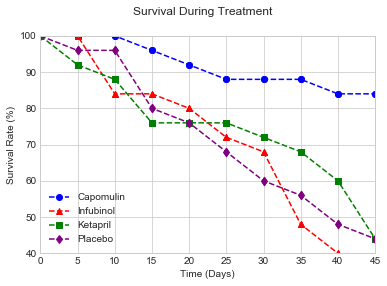

In [72]:
fig, ax = plt.subplots()
fig.suptitle("Survival During Treatment")

ax.set_xlabel("Time (Days)")
ax.set_ylabel("Survival Rate (%)")
ax.scatter(x_axis, capomulin_survival, marker="o", color="b")
ax.plot(x_axis, capomulin_survival, "bo--", label="Capomulin")
ax.scatter(x_axis, infubinol_survival, marker="^", color="r")
ax.plot(x_axis, infubinol_survival, "r^--", label="Infubinol")
ax.scatter(x_axis, ketapril_survival, marker="s", color="g")
ax.plot(x_axis, ketapril_survival, "gs--", label="Ketapril")
ax.scatter(x_axis, placebo_survival, marker="d", color="purple")
ax.plot(x_axis, placebo_survival, "d--", color="purple", label="Placebo")

ax.set_xlim(0, 45)
ax.set_ylim(40, 100)
ax.legend(loc="best", fancybox=True)
plt.show()

In [81]:
# Bar graph comparing % volume change for each drug
capomulin_change = ((capomulin_means[-1] - capomulin_means[0]) / capomulin_means[0]) * 100
infubinol_change = ((infubinol_means[-1] - infubinol_means[0]) / infubinol_means[0]) * 100
ketapril_change = ((ketapril_means[-1] - ketapril_means[0]) / ketapril_means[0]) * 100
placebo_change = ((placebo_means[-1] - placebo_means[0]) / placebo_means[0]) * 100

changes = [capomulin_change, infubinol_change, ketapril_change, placebo_change]
xticks = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]

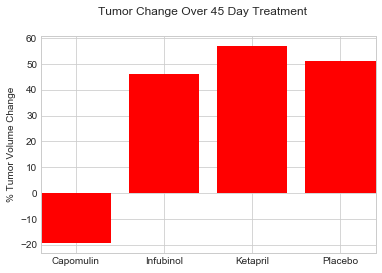

In [101]:
fig, ax = plt.subplots()
fig.suptitle("Tumor Change Over 45 Day Treatment")

ax.set_ylabel("% Tumor Volume Change")

x_axis = [0, 1, 2, 3]
xtick = [x + .4 for x in x_axis]

ax.bar(x_axis, changes, color="red", align="edge")

ax.set_xlim(0, 3.8)

plt.xticks(xtick, xticks)
plt.show()